# Training linear models
In this notebook, we will first start by looking at the Linear Regression model. The model will be trained in 2 ways:
1. Using a direct 'closed-form' equation - that directly computes the model parameters best fit to the training set.
2. Using an iterative optimization approach called Gradient Descent(GD) - that gradually tweaks the model parameters to minimize the cost function over the training set, eventually converging on the same set of parameters as the first method.

Then we will look at Polynomial Regression, a model that can fit non-linear datasets.
<br><br>
Then we will look at several Regularization techniques that can reduce the risk of overfitting the training sets.
<br><br>
Finally, we will look at 2 more models : Logistic Regression and Softmax Regression.

## Setup

In [14]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images")
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

## Linear Regression

A linear model makes prediction by calculating the weighted sum of the input featuers, plus a constanst called the <i>bias term</i> (also called the intercept term).<br><br>
The equation is as shown below:

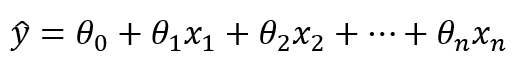

<br> where,<br>
  * ŷ is the predicted value.
  * n is the number of features.
  * $x_{i}$ is the i$^{th}$ feature value.
  * &#952;$_{j}$ is the j$^{th}$ the model parameter (including the <i>bias term &#952;$_{0}$</i> and the feature weights &#952;$_{1}$, &#952;$_{2}$, .... &#952;$_{n}$.)

The vectorized form:
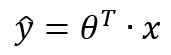

<b>Note: </b>In ML, vectors are often represented as column vectors, which are 2D arrays with a single column. &#952;$^{T}$ is the transpose of &#952; and **&#952;$^{T}$x** is the matrix multiplication of &#952;$^{T}$ and x, which is ofcourse equal to &#952;$_{0}$x$_{0}$ + &#952;$_{1}$x$_{1}$ + &#952;$_{2}$x$_{2}$ + .....  + &#952;$_{n}$x$_{n}$ 

The most common performance measure of regression model is the Root Mean Square Error (RMSE).

The motive in Linear Regression is to minimize the cost function. Given our simple linear equation *𝑦=𝑚𝑥+𝑏*, we can calculate MSE as:

 $$MSE(X, h_\theta)= \frac{1}{m} \sum_{i=1}^m (\theta^Tx^i - y^i)^2 $$

### The Normal Equation

To find the value of $\theta$ that minimizes the cost function, there is a *closed-form solution*, in other words, a math equation that gives the result directly. This is called the *Normal Equation*.
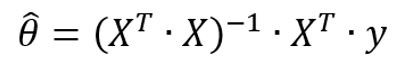

In [29]:
import numpy as np

X = 2 * np.random.rand(100, 1)

#y = mx + c
y = 4 + 3 * X + np.random.randn(100, 1) # here 𝜃0 = 4 and 𝜃1 = 3 

Saving figure generated_data_plot


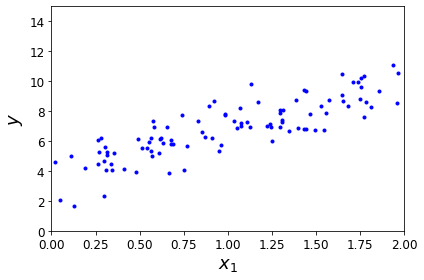

In [18]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", fontsize=18)
plt.axis([0, 2, 0, 15])
save_fig("generated_data_plot")
plt.show()

In [25]:
X_b = np.c_[np.ones((100, 1)), X] # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best

array([[3.84656783],
       [3.01337371]])

We expect $\theta_{0}$ = 4 and $\theta_{1}$ = 3, but this is close enough.

In [41]:
X_new = np.array([[0],[2]])

#print(X_new)
X_new_b = np.c_[np.ones((2,1)), X_new] # add x0 = 1 to each instance.
#print(X_new_b)

y_predict = X_new_b.dot(theta_best) 

y_predict

array([[3.84656783],
       [9.87331526]])

Saving figure linear_model_predictions_plot


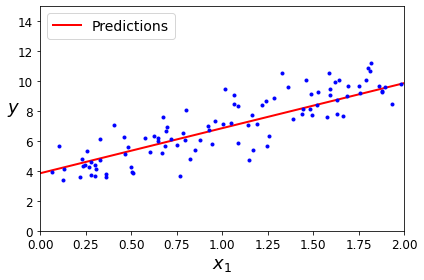

In [50]:
plt.plot(X_new, y_predict, 'r-', linewidth=2, label="Predictions")
plt.plot(X, y , 'b.')
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0,2,0,15])
save_fig("linear_model_predictions_plot")
plt.show()

Performing Linear Regression using Scikit-learn

In [52]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)

lin_reg.intercept_, lin_reg.coef_

(array([3.61308771]), array([[3.35788041]]))

In [53]:
lin_reg.predict(X_new)

array([[ 3.61308771],
       [10.32884852]])